In [4]:
from langgraph.graph import StateGraph, START, END
from plaintext_preprocessing import extract_globals, extract_steps, merge_globals_and_steps
from typing import TypedDict, Annotated

class PreprocessingInternalState(TypedDict):
    scenario: Annotated[str, "Raw scenario input"]
    globals_text: str
    steps_text: str
    refined_scenario: str

class PreprocessingOutputState(TypedDict):
    preprocessing_output: Annotated[str, "Refined scenario output"]

def extract_globals_node(state: PreprocessingInternalState) -> dict:
    return {"globals_text": extract_globals(state["scenario"])}

def extract_steps_node(state: PreprocessingInternalState) -> dict:
    return {"steps_text": extract_steps(state["scenario"])}

def merge_node(state: PreprocessingInternalState) -> dict:
    return {"refined_scenario": merge_globals_and_steps(state["globals_text"], state["steps_text"])}

def final_output_node(state: PreprocessingInternalState) -> PreprocessingOutputState:
    return {"preprocessing_output": state["refined_scenario"]}

def build_preprocessing_subgraph() -> StateGraph:
    builder = StateGraph(PreprocessingInternalState, output=PreprocessingOutputState)
    builder.add_node("extract_globals", extract_globals_node)
    builder.add_node("extract_steps", extract_steps_node)
    builder.add_node("merge", merge_node)
    builder.add_node("final_output", final_output_node)
    
    builder.add_edge(START, "extract_globals")
    builder.add_edge("extract_globals", "extract_steps")
    builder.add_edge("extract_steps", "merge")
    builder.add_edge("merge", "final_output")
    builder.add_edge("final_output", END)
    return builder.compile()

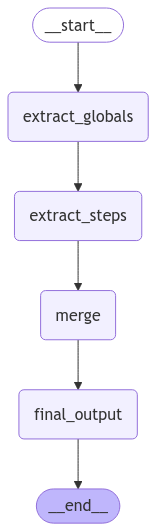

In [5]:
if __name__ == "__main__":
    graph = build_preprocessing_subgraph()
    display(Image(graph.get_graph(xray=True).draw_mermaid_png()))